# Create a "timeline" with word clouds

A simple word cloud does not often convey the changes that occur over the course of a text.
However, by splitting the text into segments and generating word clouds for each, one can get a better sense of these changes.

In [1]:
import spacy
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from itertools import zip_longest

In [2]:
with open('./data/carroll-alice.txt', 'r', encoding='utf-8-sig') as fo :
    alice = fo.read()

# alice = alice[28:]
alice=alice.split('\n')
alice = [line.strip() for line in alice]
# alice

## Group a list of utterances into a specified number

In [3]:
def grouper(input_list, num_groups, remaining_spaces=''):
    # grouper('abcdefg', 3, remaining_spaces='x') --> ('a','b','c'), ('d','e','f'), ('g','x','x')
    group_size = math.ceil(len(input_list)/num_groups)
    grouped_list = list(zip_longest(*[iter(input_list)]*group_size, fillvalue=remaining_spaces))
    grouped_list = [list(g) for g in grouped_list]
    last_item = ' '.join(grouped_list[-1]).split()
    if len(last_item) <= 2 :
        grouped_list[-2].extend(last_item)
        grouped_list.pop()
    output = [' '.join(list(group)).strip() for group in grouped_list]
    return output

## Plot word cloud for each group

In [4]:
def plot_word_cloud_timeline(text_list, num_segments=10, stop_words=STOPWORDS):
    grouped_text = grouper(text_list, num_segments)
    fig = plt.figure(constrained_layout=True, dpi=300)
    widths = [1 for x in grouped_text]
    color_func = lambda *args, **kwargs: 'black'
    spec = fig.add_gridspec(ncols=len(grouped_text),
                            width_ratios=widths,
                            wspace=0.0, hspace=0.0)
    for ind, text in enumerate(grouped_text):
        ax = fig.add_subplot(spec[ind])
        wc = WordCloud(width=500, height=500,
                       background_color="white",
                       color_func=color_func,
                       max_words=100,
                       stopwords=stop_words)
        wc.generate_from_text(text)
        ax.imshow(wc)
        ax.axis("off")
    plt.savefig('../plots/timeline_wordcloud.pdf', bbox_inches='tight')

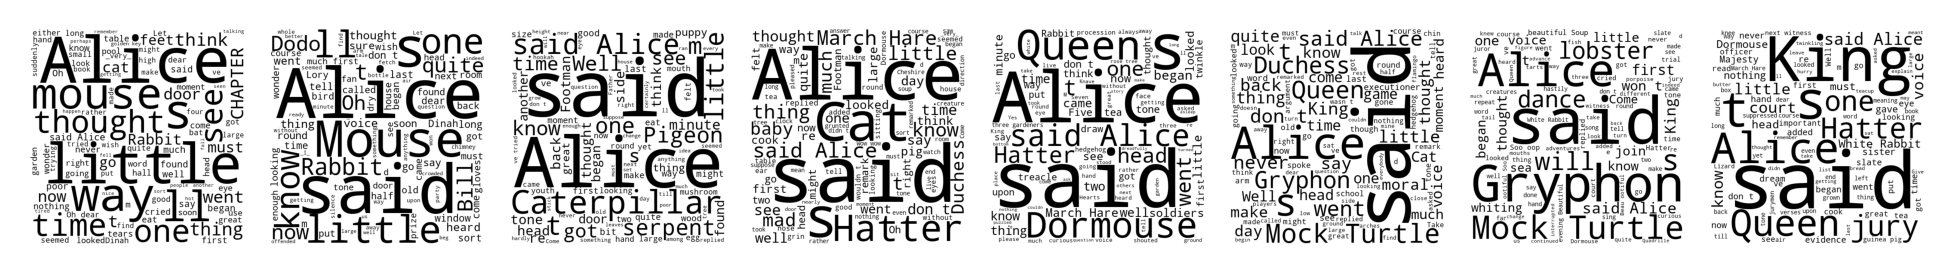

In [7]:
stop_words_for_wc = STOPWORDS.copy()
plot_word_cloud_timeline(alice, num_segments=8, stop_words=stop_words_for_wc)

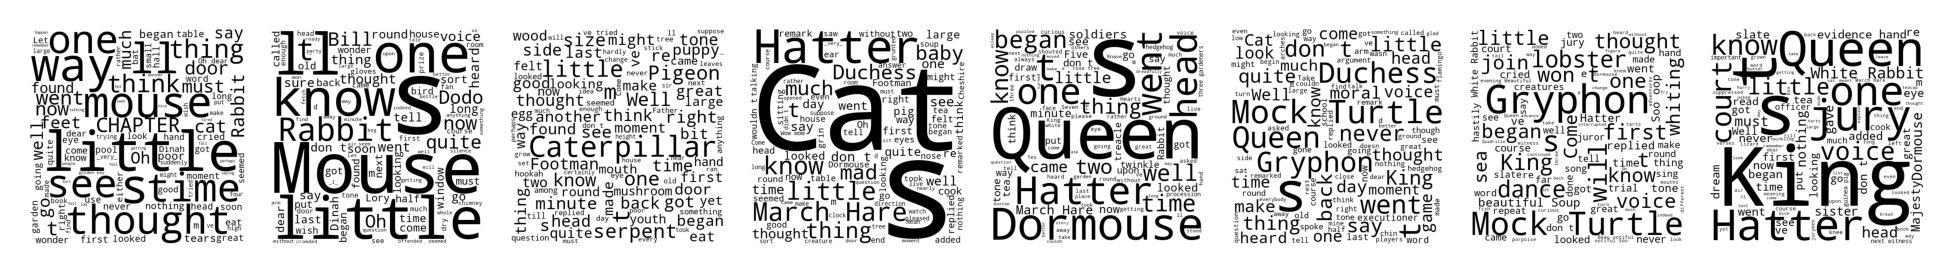

In [8]:
stop_words_updated = STOPWORDS.copy()
stop_words_updated.update(['Alice', 'said'])
plot_word_cloud_timeline(alice, num_segments=8, stop_words=stop_words_updated)